In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps


from Config import gkey

In [14]:
Coronavirus_data = pd.read_csv("us_healthcare_capacity-county-CovidCareMap.csv")
Coronavirus_data.head()   

,fips_code,State,County Name,Staffed All Beds,Staffed ICU Beds,Licensed All Beds,All Bed Occupancy Rate,ICU Bed Occupancy Rate,Population,Population (20+),...,Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Staffed ICU Beds [Per 1000 People],Staffed ICU Beds [Per 1000 Adults (20+)],Staffed ICU Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)],ICU Bed Source,ICU Bed Source Last Updated
0,2016,AK,Aleutians West,0.0,0.0,0.0,NaN,NaN,5723.0,4983.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Facility aggregation,NaN
1,2020,AK,Anchorage,979.0,73.0,1149.0,0.66,0.71,291538.0,213508.0,...,4.585,30.279,0.250,0.342,2.258,3.941,5.382,35.536,Facility aggregation,NaN
2,2050,AK,Bethel,34.0,0.0,37.0,0.40,NaN,18216.0,11082.0,...,3.068,24.251,0.000,0.000,0.000,2.031,3.339,26.391,Facility aggregation,NaN
3,2070,AK,Dillingham,18.0,0.0,18.0,0.15,NaN,5000.0,3278.0,...,5.491,38.298,0.000,0.000,0.000,3.600,5.491,38.298,Facility aggregation,NaN
4,2090,AK,Fairbanks North Star,145.0,13.0,175.0,0.46,0.66,98971.0,72505.0,...,2.000,14.210,0.131,0.179,1.274,1.768,2.414,17.150,Facility aggregation,NaN


In [15]:
cleaned_data = Coronavirus_data.drop(['Population', 'Population (20+)','Staffed ICU Beds [Per 1000 People]', 'Licensed All Beds [Per 1000 People]','Licensed All Beds [Per 1000 Adults (20+)]','Licensed All Beds [Per 1000 Elderly (65+)]','ICU Bed Source', 'ICU Bed Source Last Updated'], axis=1)
cleaned_data

,fips_code,State,County Name,Staffed All Beds,Staffed ICU Beds,Licensed All Beds,All Bed Occupancy Rate,ICU Bed Occupancy Rate,Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Staffed ICU Beds [Per 1000 Adults (20+)],Staffed ICU Beds [Per 1000 Elderly (65+)]
0,2016,AK,Aleutians West,0.0,0.0,0.0,NaN,NaN,394.0,0.000,0.000,0.000,0.000,0.000
1,2020,AK,Anchorage,979.0,73.0,1149.0,0.66,0.71,32333.0,3.358,4.585,30.279,0.342,2.258
2,2050,AK,Bethel,34.0,0.0,37.0,0.40,NaN,1402.0,1.866,3.068,24.251,0.000,0.000
3,2070,AK,Dillingham,18.0,0.0,18.0,0.15,NaN,470.0,3.600,5.491,38.298,0.000,0.000
4,2090,AK,Fairbanks North Star,145.0,13.0,175.0,0.46,0.66,10204.0,1.465,2.000,14.210,0.179,1.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,56037,WY,Sweetwater,74.0,10.0,115.0,0.25,0.23,5214.0,1.719,2.417,14.193,0.327,1.918
2533,56039,WY,Teton,48.0,6.0,48.0,0.36,0.33,3558.0,2.080,2.593,13.491,0.324,1.686
2534,56041,WY,Uinta,105.0,6.0,225.0,0.58,0.11,2858.0,5.173,7.514,36.739,0.429,2.099
2535,56043,WY,Washakie,18.0,0.0,18.0,0.29,NaN,1710.0,2.283,3.044,10.526,0.000,0.000


In [16]:
extra_clean_data = cleaned_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
extra_clean_data

,fips_code,State,County Name,Staffed All Beds,Staffed ICU Beds,Licensed All Beds,All Bed Occupancy Rate,ICU Bed Occupancy Rate,Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Staffed ICU Beds [Per 1000 Adults (20+)],Staffed ICU Beds [Per 1000 Elderly (65+)]
1,2020,AK,Anchorage,979.0,73.0,1149.0,0.66,0.71,32333.0,3.358,4.585,30.279,0.342,2.258
4,2090,AK,Fairbanks North Star,145.0,13.0,175.0,0.46,0.66,10204.0,1.465,2.000,14.210,0.179,1.274
5,2110,AK,Juneau,45.0,9.0,73.0,0.41,0.32,4298.0,1.401,1.835,10.470,0.367,2.094
6,2122,AK,Kenai Peninsula,76.0,6.0,77.0,0.56,0.69,10188.0,1.298,1.724,7.460,0.136,0.589
7,2130,AK,Ketchikan Gateway,25.0,4.0,25.0,0.42,0.31,2162.0,1.796,2.378,11.563,0.380,1.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,56025,WY,Natrona,372.0,14.0,414.0,0.55,0.56,12180.0,4.702,6.379,30.542,0.240,1.149
2531,56033,WY,Sheridan,71.0,11.0,88.0,0.37,0.34,6347.0,2.348,3.084,11.186,0.478,1.733
2532,56037,WY,Sweetwater,74.0,10.0,115.0,0.25,0.23,5214.0,1.719,2.417,14.193,0.327,1.918
2533,56039,WY,Teton,48.0,6.0,48.0,0.36,0.33,3558.0,2.080,2.593,13.491,0.324,1.686


In [17]:
us_coord = pd.read_csv("coordinates.csv")
us_coord.head()

,State,lat,lng
0,WI,44.5,-89.500000
1,WV,39.0,-80.500000
2,VT,44.0,-72.699997
3,TX,31.0,-100.000000
4,SD,44.5,-100.000000


In [18]:
merged_data = pd.merge(extra_clean_data, us_coord, how='outer', on=['State', 'State'])
merged_data

,fips_code,State,County Name,Staffed All Beds,Staffed ICU Beds,Licensed All Beds,All Bed Occupancy Rate,ICU Bed Occupancy Rate,Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Staffed ICU Beds [Per 1000 Adults (20+)],Staffed ICU Beds [Per 1000 Elderly (65+)],lat,lng
0,2020,AK,Anchorage,979.0,73.0,1149.0,0.66,0.71,32333.0,3.358,4.585,30.279,0.342,2.258,66.160507,-153.369141
1,2090,AK,Fairbanks North Star,145.0,13.0,175.0,0.46,0.66,10204.0,1.465,2.000,14.210,0.179,1.274,66.160507,-153.369141
2,2110,AK,Juneau,45.0,9.0,73.0,0.41,0.32,4298.0,1.401,1.835,10.470,0.367,2.094,66.160507,-153.369141
3,2122,AK,Kenai Peninsula,76.0,6.0,77.0,0.56,0.69,10188.0,1.298,1.724,7.460,0.136,0.589,66.160507,-153.369141
4,2130,AK,Ketchikan Gateway,25.0,4.0,25.0,0.42,0.31,2162.0,1.796,2.378,11.563,0.380,1.850,66.160507,-153.369141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,56025,WY,Natrona,372.0,14.0,414.0,0.55,0.56,12180.0,4.702,6.379,30.542,0.240,1.149,43.075970,-107.290283
1389,56033,WY,Sheridan,71.0,11.0,88.0,0.37,0.34,6347.0,2.348,3.084,11.186,0.478,1.733,43.075970,-107.290283
1390,56037,WY,Sweetwater,74.0,10.0,115.0,0.25,0.23,5214.0,1.719,2.417,14.193,0.327,1.918,43.075970,-107.290283
1391,56039,WY,Teton,48.0,6.0,48.0,0.36,0.33,3558.0,2.080,2.593,13.491,0.324,1.686,43.075970,-107.290283


In [19]:
# number of countys
Counties = extra_clean_data['fips_code'].count()
Counties

1393

In [20]:
#hospital beds per county in each state
hospital_beds = extra_clean_data.groupby(['State']).sum()['Staffed All Beds']
hospital_beds

State
AK     1344.0
AL    14389.0
AR     8803.0
AZ    15414.0
CA    82372.0
CO     9783.0
CT     7504.0
DC     3190.0
DE     3481.0
FL    59551.0
GA    20727.0
HI     2881.0
IA     5734.0
ID     2769.0
IL    28140.0
IN    16108.0
KS     6842.0
KY    12578.0
LA    15454.0
MA    18892.0
MD    13027.0
ME     2948.0
MI    21749.0
MN     9660.0
MO    18908.0
MS     8738.0
MT     1821.0
NC    20962.0
ND     2089.0
NE     4550.0
NH     2640.0
NJ    22084.0
NM     3994.0
NV     7532.0
NY    46679.0
OH    33206.0
OK    10203.0
OR     7275.0
PA    36401.0
RI     3014.0
SC    12200.0
SD     1488.0
TN    18102.0
TX    68094.0
UT     5448.0
VA    14045.0
VT      797.0
WA    12284.0
WI    10175.0
WV     5643.0
WY     1094.0
Name: Staffed All Beds, dtype: float64

In [21]:
#occupancy rate in hospitals per county in each state
occupancy_rate = extra_clean_data.groupby(['State']).sum()['All Bed Occupancy Rate']
occupancy_rate

State
AK     3.23
AL    18.92
AR    11.14
AZ     5.23
CA    26.55
CO    12.55
CT     4.81
DC     0.76
DE     2.12
FL    33.02
GA    32.02
HI     2.63
IA    10.60
ID     6.42
IL    18.68
IN    23.95
KS    13.40
KY    19.76
LA    14.92
MA     8.12
MD    13.60
ME     6.65
MI    22.49
MN    14.56
MO    17.94
MS    13.05
MT     5.71
NC    32.36
ND     3.24
NE     5.75
NH     5.63
NJ    13.49
NM     7.31
NV     2.26
NY    25.26
OH    29.49
OK    10.60
OR    11.56
PA    27.51
RI     2.10
SC    15.93
SD     3.95
TN    19.82
TX    40.36
UT     4.91
VA    24.51
VT     4.50
WA    13.16
WI    16.24
WV    11.40
WY     3.21
Name: All Bed Occupancy Rate, dtype: float64

In [22]:
#Configure gmaps.
gmaps.configure(api_key = gkey)
#Use the Lat and Lng as locations and State as the weight.
locations = merged_data[["lat", "lng"]]
#Add Heatmap layer to map.
State = merged_data["All Bed Occupancy Rate"]

In [53]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

params = {"type" : "lodging",
          "radius" : 50,
          "key" : gkey}

In [54]:
# map for locations and Occupancy Rate
fig = gmaps.figure(center=(43.075970, -107.290283), zoom_level=2)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = State, dissipating=False, max_intensity=np.max(State), point_radius=4)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
icu_occupancy_rate = extra_clean_data.groupby(['State']).sum()['ICU Bed Occupancy Rate']
icu_occupancy_rate

State
AK     3.020000
AL    22.000000
AR    12.140000
AZ     5.120000
CA    25.519583
CO    11.470000
CT     4.780000
DC     0.630000
DE     2.040000
FL    35.930000
GA    32.710000
HI     2.650000
IA     9.430000
ID     5.350000
IL    18.440000
IN    21.390000
KS    10.720000
KY    23.600000
LA    15.280000
MA     7.160000
MD    12.320000
ME     6.450000
MI    25.380000
MN    11.750000
MO    18.510000
MS    14.840000
MT     5.210000
NC    32.630000
ND     2.460000
NE     6.140000
NH     4.150000
NJ    12.070000
NM     7.550000
NV     2.550000
NY    23.180000
OH    30.160000
OK    11.010000
OR    10.530000
PA    26.320000
RI     2.590000
SC    16.900000
SD     2.450000
TN    24.870000
TX    38.430000
UT     5.060000
VA    26.980000
VT     2.670000
WA    11.050000
WI    15.360000
WV    11.490000
WY     2.720000
Name: ICU Bed Occupancy Rate, dtype: float64

In [29]:
grouped_df = merged_data.groupby(['State'])['Staffed All Beds [Per 1000 Adults (20+)]', 'Staffed All Beds [Per 1000 Elderly (65+)]', 'Staffed ICU Beds [Per 1000 Adults (20+)]', 'Staffed ICU Beds [Per 1000 Elderly (65+)]'].apply(lambda x : x.astype(float).sum()).reset_index()
grouped_df

C:\Users\whitn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State,Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Staffed ICU Beds [Per 1000 Adults (20+)],Staffed ICU Beds [Per 1000 Elderly (65+)]
0,AK,13.492,79.757,1.588,9.158
1,AL,154.438,656.203,16.366,69.303
2,AR,117.991,507.829,11.493,48.726
3,AZ,26.773,100.068,2.717,10.127
4,CA,118.486,568.375,12.129,57.424
5,CO,55.926,278.049,6.173,31.538
6,CT,17.463,77.393,1.532,6.725
7,DC,5.761,37.396,0.724,4.701
8,DE,11.100,49.323,0.853,3.717
9,FL,145.261,562.916,15.577,61.342


In [48]:
#grouped_df['State']

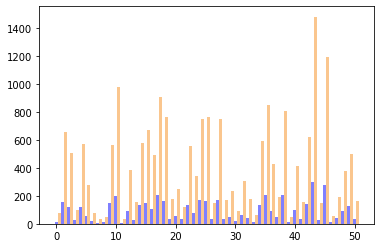

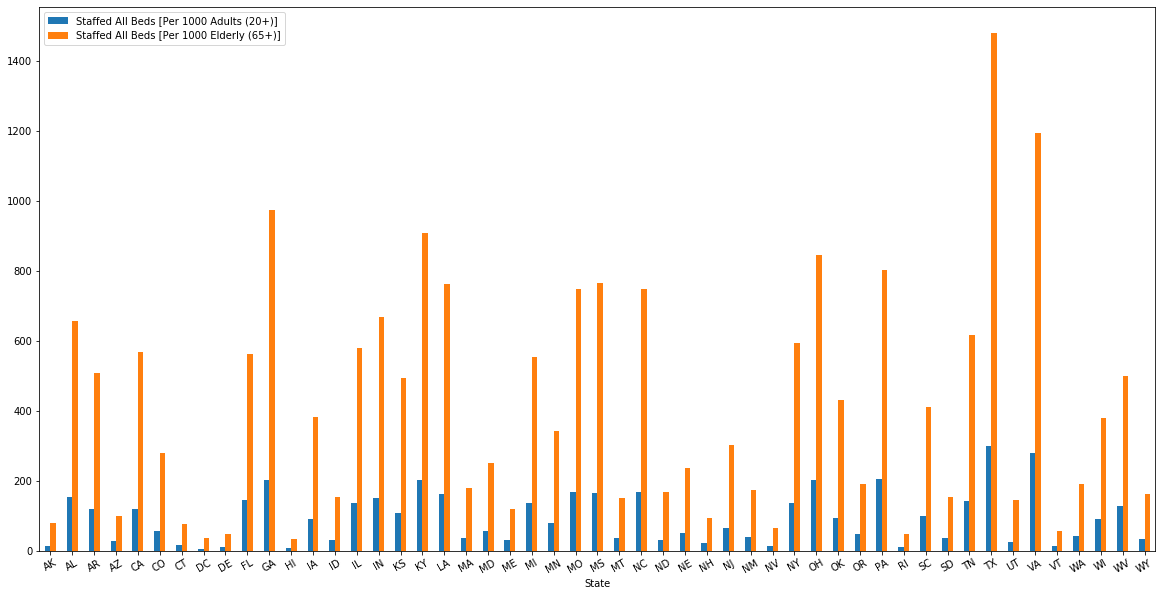

In [51]:
# Setting the positions and width for the bars
pos = list(range(len(grouped_df['Staffed All Beds [Per 1000 Adults (20+)]']))) 
width = .50 
    
# Plotting the bars

# in position pos,
plt.bar(pos, 
grouped_df['Staffed All Beds [Per 1000 Adults (20+)]'], 
        # of width
width,
#height, 
        # with alpha 0.5
alpha=0.5, 
        # with color
color='blue', 
label=grouped_df['State'][0]) 


# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
grouped_df['Staffed All Beds [Per 1000 Elderly (65+)]'],
        # of width
width,
#height,
        # with alpha 0.5
alpha=0.5, 
        # with color
color='#F78F1E',
label=grouped_df['State'][1]) 

# Set the y axis label
ax.set_ylabel('per 1000 hospitalized')

# Set the chart's title
ax.set_title('Staffed Beds per age group in each state')


ax = grouped_df[['Staffed All Beds [Per 1000 Adults (20+)]', 'Staffed All Beds [Per 1000 Elderly (65+)]', 'State']].plot.bar(x='State', rot=30, figsize=(20,10))





<Figure size 432x288 with 0 Axes>

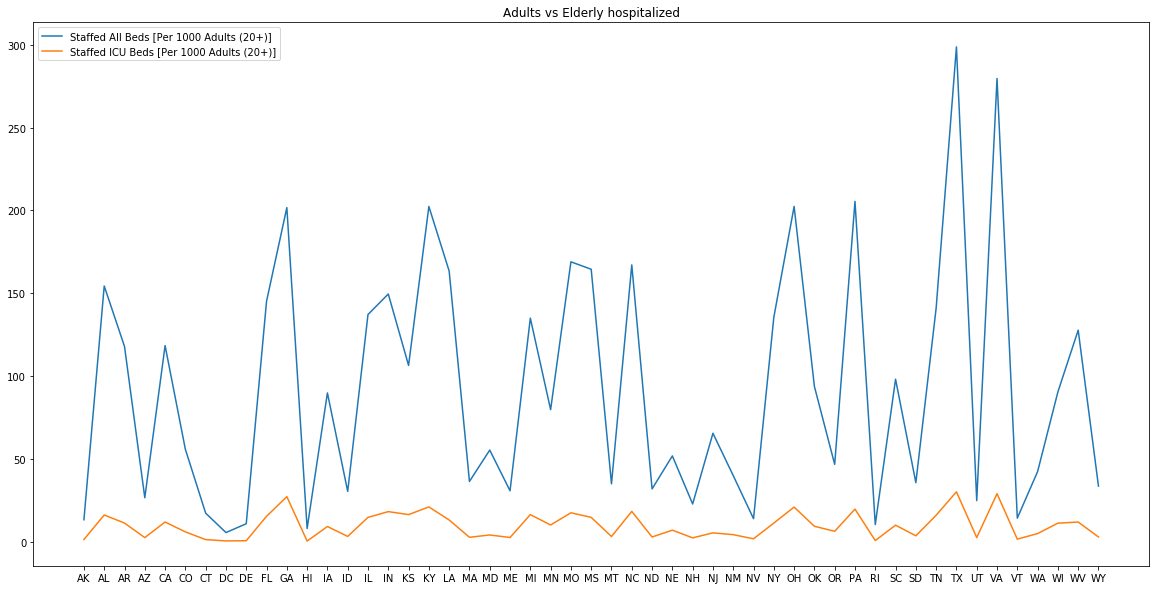

In [45]:
plt.figure()
x = grouped_df['State']
y1 = grouped_df['Staffed All Beds [Per 1000 Adults (20+)]']
y2 = grouped_df['Staffed ICU Beds [Per 1000 Adults (20+)]']
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Adults Hospitalized vs Adults in ICU')
ax.plot(x, y1, label='Staffed All Beds [Per 1000 Adults (20+)]')
ax.plot(x, y2, label='taffed ICU Beds [Per 1000 Adults (20+)]')
plt.legend(['Staffed All Beds [Per 1000 Adults (20+)]', 'Staffed ICU Beds [Per 1000 Adults (20+)]'], loc='upper left')


In [108]:
correlations = round(sts.pearsonr(grouped_df['Staffed All Beds [Per 1000 Adults (20+)]'], grouped_df['Staffed All Beds [Per 1000 Elderly (65+)]'])[0], 2)
print(f"correlation is {correlations}")

NameError: name 'sts' is not defined

<Figure size 432x288 with 0 Axes>

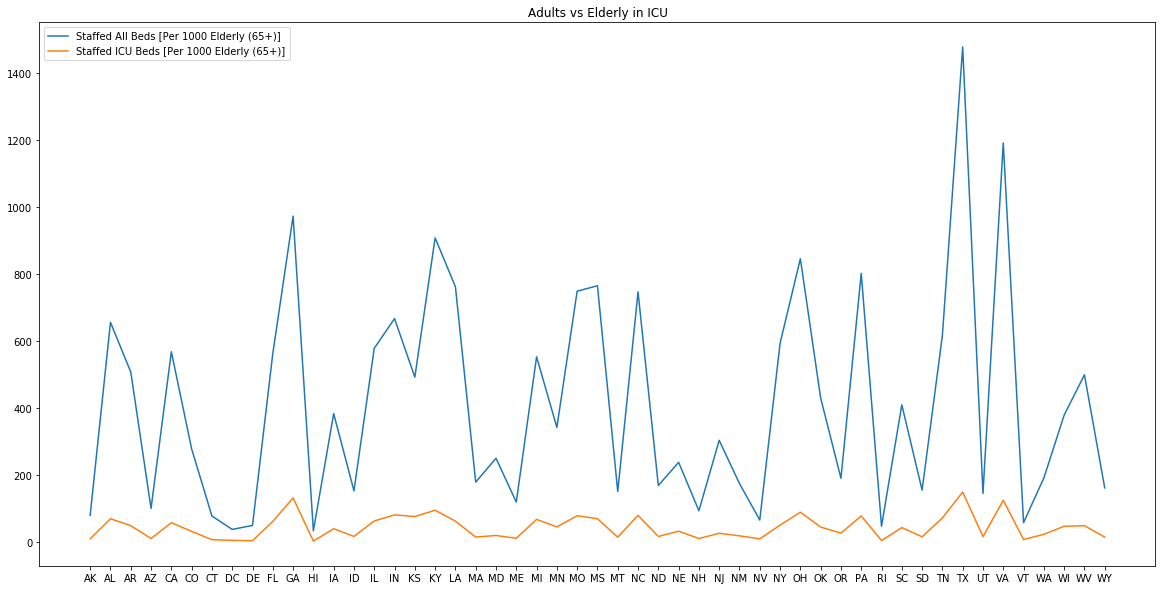

In [52]:
plt.figure()
x = grouped_df['State']
y1 = grouped_df['Staffed All Beds [Per 1000 Elderly (65+)]']
y2 = grouped_df['Staffed ICU Beds [Per 1000 Elderly (65+)]']
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Elderly Hospitilized vs Elderly in ICU')
ax.plot(x, y1, label='Staffed All Beds [Per 1000 Elderly (65+)]')
ax.plot(x, y2, label='taffed ICU Beds [Per 1000 Elderly (65+)]')
plt.legend(['Staffed All Beds [Per 1000 Elderly (65+)]', 'Staffed ICU Beds [Per 1000 Elderly (65+)]'], loc='upper left')
